# Data cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
recipes_raw = pd.read_csv('../final-project/data/allrecipes-raw-data/raw-data_recipe.csv')
interactions_raw = pd.read_csv('../final-project/data/allrecipes-raw-data/raw-data_interaction.csv')

## 1. Recipes data

### 1.1 Data exploration

In [3]:
recipes_raw.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


In [4]:
recipes_raw.dtypes

recipe_id               int64
recipe_name            object
aver_rate             float64
image_url              object
review_nums             int64
ingredients            object
cooking_directions     object
nutritions             object
reviews                object
dtype: object

In [5]:
recipes_raw.describe()

,recipe_id,aver_rate,review_nums
count,49698.000000,49698.000000,49698.000000
mean,131092.695119,4.311699,76.342408
std,98230.166389,0.485282,282.160920
min,6663.000000,0.000000,1.000000
25%,22244.250000,4.081311,6.000000
50%,142057.500000,4.411765,17.000000
75%,231644.750000,4.622239,54.000000
max,262956.000000,5.000000,11191.000000


The dataset has **49.698 recipes recipes**.

Data cleaning / wrangling to do's:
- Drop: 'image_url', 'cooking_directions', 'nutritions', 'reviews' 
- Transform 'ingredients': create a new row for each ingredient found in the recipe

### 1.2 Data cleaning / wrangling

In [6]:
# Create a copy of the raw DataFrame
recipes = recipes_raw.copy()

# Drop columns
recipes = recipes.drop(columns=['image_url', 'cooking_directions', 'nutritions', 'reviews'])

recipes.head()

,recipe_id,recipe_name,aver_rate,review_nums,ingredients
0,222388,Homemade Bacon,5.000000,3,pork belly^smoked paprika^kosher salt^ground b...
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained^Granny Smith apples sliced^...
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,chicken wings^sprigs rosemary^head garlic^oliv...
3,87211,Chicken Pesto Paninis,4.625000,163,focaccia bread quartered^prepared basil pesto^...
4,245714,Potato Bacon Pizza,4.500000,2,red potatoes^strips bacon^Sauce:^heavy whippin...


In [7]:
# Convert 'ingredients' to list
recipes['ingredients'] = recipes['ingredients'].str.split('^')

In [8]:
recipes.head()

,recipe_id,recipe_name,aver_rate,review_nums,ingredients
0,222388,Homemade Bacon,5.000000,3,"[pork belly, smoked paprika, kosher salt, grou..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,"[sauerkraut drained, Granny Smith apples slice..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,"[chicken wings, sprigs rosemary, head garlic, ..."
3,87211,Chicken Pesto Paninis,4.625000,163,"[focaccia bread quartered, prepared basil pest..."
4,245714,Potato Bacon Pizza,4.500000,2,"[red potatoes, strips bacon, Sauce:, heavy whi..."


In [9]:
# Create a new row per each recipe ingredient
recipes_ing = recipes.apply(lambda x: pd.Series(x['ingredients']),axis=1).stack().reset_index(level=1, drop=True)


In [10]:
# name of the new column
recipes_ing.name = 'ingredient'

# drop column and join ingredients
recipes_ingredients = recipes.drop('ingredients', axis=1, errors='ignore').join(recipes_ing)

# reset_index
recipes_ingredients = recipes_ingredients.reset_index(drop=True)

In [11]:
recipes_ingredients.head()

,recipe_id,recipe_name,aver_rate,review_nums,ingredient
0,222388,Homemade Bacon,5.000000,3,pork belly
1,222388,Homemade Bacon,5.000000,3,smoked paprika
2,222388,Homemade Bacon,5.000000,3,kosher salt
3,222388,Homemade Bacon,5.000000,3,ground black pepper
4,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained


In [12]:
recipes.to_csv('data/to_sql/recipes.csv')

**Possible optimizations**: creating the relationship recipes-ingredients in a separate table

## 2. Interactions data

### 2.1 Data exploration

In [13]:
interactions_raw.head()

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n


In [14]:
interactions_raw.dtypes

user_id              int64
recipe_id            int64
rating               int64
dateLastModified    object
dtype: object

In [15]:
interactions_raw.describe()

,user_id,recipe_id,rating
count,3.794003e+06,3.794003e+06,3.794003e+06
mean,4.860243e+06,6.112180e+04,4.513192e+00
std,5.010315e+06,7.178721e+04,8.754177e-01
min,1.600000e+01,6.663000e+03,1.000000e+00
25%,1.404674e+06,1.423500e+04,4.000000e+00
50%,2.954489e+06,2.339000e+04,5.000000e+00
75%,6.384689e+06,7.864900e+04,5.000000e+00
max,2.346374e+07,2.629560e+05,5.000000e+00


In [16]:
print(f"Total reviews: {len(interactions_raw)}")
print(f"Unique users: {len(interactions_raw['user_id'].unique())}")

Total reviews: 3794003
Unique users: 1160267


Data cleaning / wrangling to do's:
- Drop: 'dateLastModified'

### 2.2 Data cleaning / wrangling

In [17]:
# Create a copy of the raw interactions DataFrame
interactions = interactions_raw.copy()

# Drop columns
interactions = interactions.drop(columns=['dateLastModified'])

In [18]:
interactions.head()

,user_id,recipe_id,rating
0,8542392,222388,5
1,11174581,222388,5
2,8262477,222388,5
3,3574785,240488,5
4,12145410,240488,2


In [19]:
interactions.to_csv('data/to_sql/interactions.csv')

## 3. Ingredients data

In [20]:
print(f"Number of ingredients: {recipes_ingredients['ingredient'].value_counts().count()}")

Number of ingredients: 38131


38,131 ingredients might seem a bit too much for the ingredient recommender that we want to find. So for the sake of simplifying I will explore the column and drop those ingredients without the enough amount of data to be significance. 

In [21]:
# Create a DataFrame with a list of dics
ing = [(x, ((recipes_ingredients['ingredient'].value_counts()) > x).sum()) for x in range(1, 100)]

In [22]:
ingredients_temp = pd.DataFrame(ing, columns=['Count Filter', 'Unique Ingredients'])

In [23]:
ingredients_temp.head(10)

,Count Filter,Unique Ingredients
0,1,14222
1,2,9324
2,3,7132
3,4,5911
4,5,5039
5,6,4446
6,7,3949
7,8,3572
8,9,3257
9,10,3011


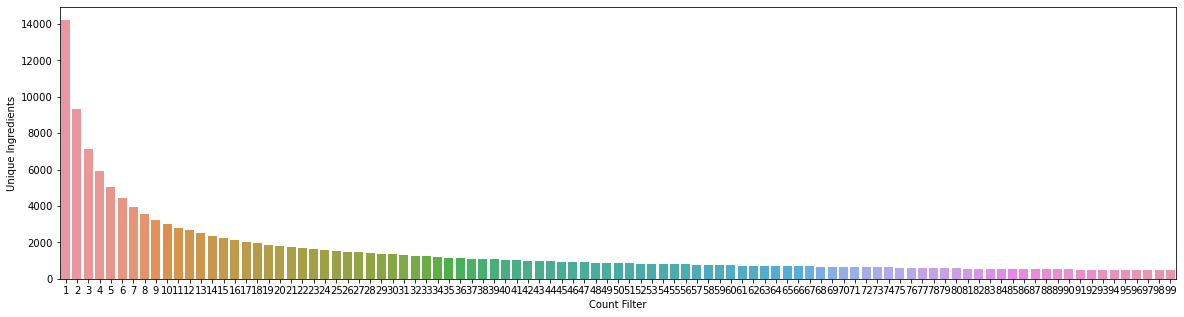

In [24]:
plt.figure(figsize=(20,5))

ax = sns.barplot(data=ingredients_temp,
            x='Count Filter',
            y='Unique Ingredients')

I will drop those ingredients that appear less than 10 times. 

In [25]:
ingredients = pd.DataFrame(recipes_ingredients['ingredient'].value_counts())

In [26]:
ingredients = ingredients.reset_index()

# Rename columns
ingredients = ingredients.rename(columns={'index': 'Ingredient', 'ingredient': 'Count', })

# Filter only those ingredients that have >10 appearances
threshold = ingredients['Count'] > 10

# Subset our dataset
ingredients = ingredients[threshold]

In [27]:
ingredients.head()

,Ingredient,Count
0,salt,15070
1,butter,13263
2,white sugar,13032
3,all-purpose flour,10257
4,garlic,8113


In [28]:
ingredients.shape

(3011, 2)

In [29]:
ingredients.to_csv('data/to_sql/ingredients.csv')